In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import tensorflow as tf

# Módulos para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Módulos para Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, MaxPooling2D
import tensorflow.keras

# Módulos de métricas
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [15]:
# Criando uma lista com os nomes dos labels, já que se trata de um dataset de imagens de números de 0a9
class_names = ["0","1","2","3","4","5","6","7","8","9"]

# normalizando ao dividir os pixels por 255, pois se trata de um sistema de 8bits, em que cada pixel
#  varia de 0 a 255 de escala de cor (2^8)
X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
# É possível ver que os dados de treino/teste possuem 60mil e 10mil obs, com imagens de 28x28 pixels
# Isso quer dizer que é uma imagem minúscula. Mas como se trata apenas de números, tudo bem. Imagens
# mais complexas necessitariam de resolução melhor.
print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)

(10000, 28, 28) (10000,)


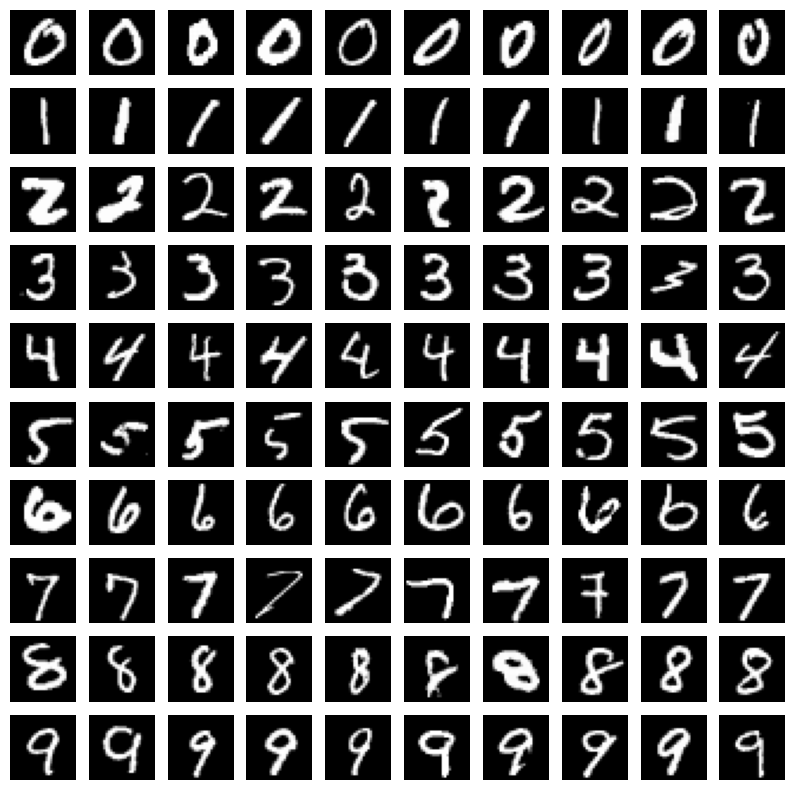

In [33]:
# Será feito um laço só para ver os tipos de imagens que temos no dataset
f, ax = plt.subplots(10,10, figsize=(10,10))
for i, class_name in enumerate(class_names):
    idxs = np.argwhere(y_train==i)
    idxs = random.choices(idxs, k=10)
    for n in range(0,10):
        idx = idxs[n][0]
        img = X_train[idx]
        ax[i][n].imshow(img, cmap="gray")
        ax[i][n].axis("off")
plt.axis("off")
plt.show()


In [34]:
# Como o Machine Learning não trabalha com tensores de 3+ dimensões, vou precisar redimensionar
# para 2 dimensões. Logo, ele vai pegar as dimensões de largura e altura (28x28) em pixels e trazer
# a quantidade total de pixels (784)
X_train_rd = X_train.reshape(60000,-1)
X_test_rd = X_test.reshape(10000,-1)
print(X_train_rd.shape)
print()
print(X_test_rd.shape)

(60000, 784)

(10000, 784)


In [35]:
# Aplicando ML
number_rf = RandomForestClassifier()
number_rf.fit(X_train_rd, y_train)
y_pred_rf = number_rf.predict(X_test_rd) 

In [36]:
# Analisando o resultado do modelo

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



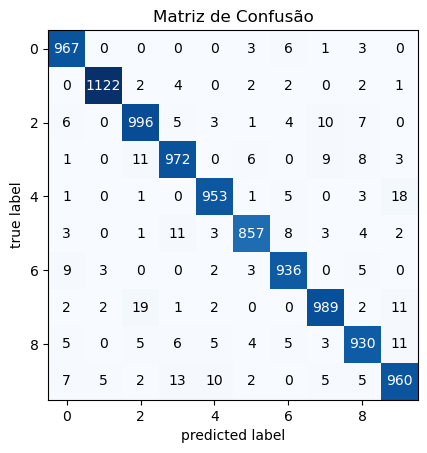

In [39]:
cm = confusion_matrix(y_test, y_pred_rf)

plot_confusion_matrix(conf_mat=cm)
plt.title("Matriz de Confusão")
plt.show()

In [40]:
# para entender a distribuição de probabilidades, vamos fazer uma função para plotar as imagens dos números,
# para mostrar graficamente

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)


# Cria o gráfico com as probabilidades, que ficará ao lado das imagens dos números

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

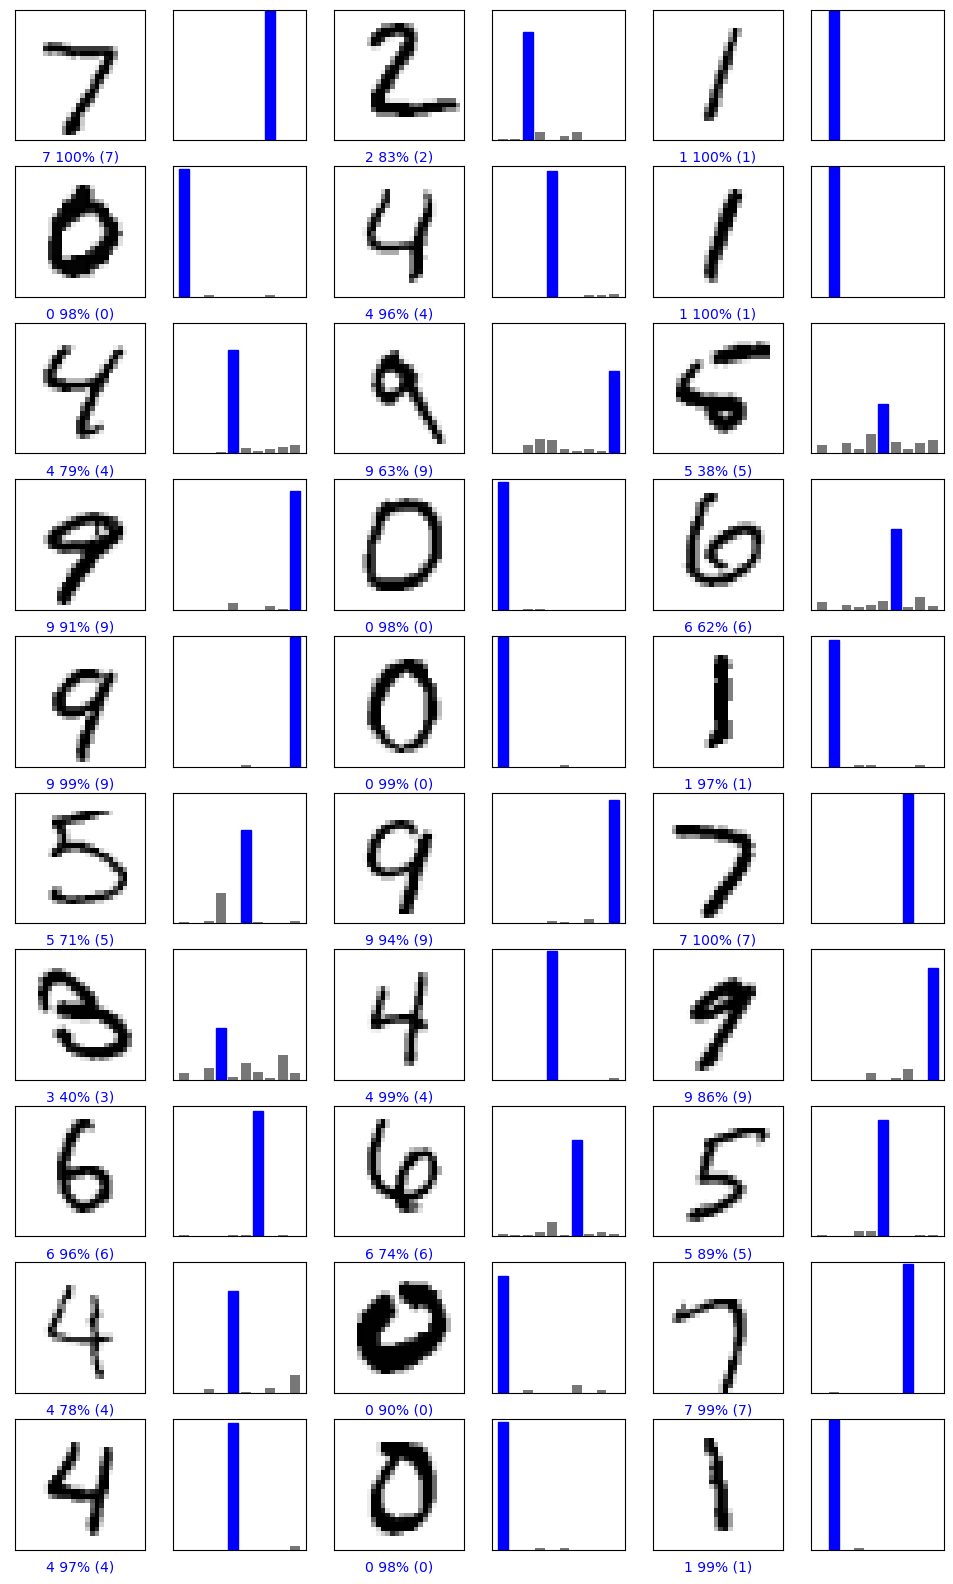

In [59]:
# Agora as probabilidades serão mostradas juntamente com a parte visual

y_prob_rf = number_rf.predict_proba(X_test_rd)

n_rows = 10
n_cols = 3
n_images = n_rows*n_cols

plt.figure(figsize=(2*2*n_cols, 2*n_rows))

for i in range(n_images):
    plt.subplot(n_rows, 2*n_cols, 2*i+1)
    plot_image(i, y_prob_rf, y_test, X_test)
    plt.subplot(n_rows, 2*n_cols, 2*i+2)
    plot_value_array(i, y_prob_rf, y_test)
plt.show()

In [67]:
# CNN - Redes Neurais Convolucionais
# Vamos precisar fazer um reshape, para que volte a ser um problema tridimensional
# Então, teremos 60mil observações, número de pixels em altura e em largura e o "1" é o número de canais
# Como se trata apenas de escala de cinza, colocar esse 1 não faz diferença. Contudo, se tivéssemos várias
# cores, aí seria diferente. Seria necessário especificar as dimensões do RGB que usaríamos
# (acho que até 3).

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print(X_train_cnn.shape)

X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_test_cnn.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [68]:
# Para construir uma rede convolucional, vou precisar construir uma sequência de camadas.
# A primeira é a mais importante (Convolução em 2D - já que é uma imagem plana). Ela vai receber 32
# neurônios, dimensão 3x3, com o tipo de função de ativação "Relu", o que ele vai receber de input
# das minhas imagens (camadas de 28x28x1).
# Na camada Maxpool, é outra camada que vai receber neuronios na dimensao 2x2
# Uma cada intermediária, chamada Flatten, onde estarão minhas hidden layers (camadas ocultas)
# Nas duas últimas camadas, terei do tipo Dense. Na penúltima, receberá 100 neurônios, ativação "relu"
# tambem. E a última camada Dense, a que mostrará o output de fato, com 10 neurônios. Esse 10 se baseia
# na quantidade de labels que eu preciso. Se tenho 10 rótulos (0a9), serão 10 neurônios de output.
# Nessa última camada, é comum usar o tipo de função SoftMax.

cnn = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1), name="Conv2D"),
    MaxPool2D((2,2), name="Max_Pool"),
    Flatten(name="flatten"),
    Dense(100, activation="relu", name="Dense_it"),
    Dense(10, activation="softmax", name="Output_layer")
])


# Depois, vamos compilar todas essas camadas com o otimizador do tipo Adam. E como função custo, vamos 
# usar a crossentropy esparsa, com o tipo de métrica de acurácia.

cnn.compile(optimizer="adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])


# Por último, o sumário trará, por camadas criadas, o shape de output de cada camada e a sua quantidade
# de parâmetros. No final, eu tenho uma soma da quantidade de parâmetros, dividindo-os em treináveis
# e não treináveis.
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 Max_Pool (MaxPooling2D)     (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 Dense_it (Dense)            (None, 100)               540900    
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Agora, vou dar o "fit" para treinar essa rede neural, com o número de épocas (que é a quantidade
#  de treinamentos). Em seguida, com o algoritmo treinado, vou fazer as previsões.
# O cnn.predict devolveria uma densidade de probabilidades, que seria difícil de entender. Logo, é usado
# o argmax() para que sejam retornados os rótulos das predições (de 0a9)

cnn.fit(X_train_cnn, y_train, epochs=3)

y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis = -1)

y_pred_cnn

Epoch 1/3
1875/1875 [==============================] - 40s 20ms/step - loss: 0.1478 - accuracy: 0.9561
Epoch 2/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0530 - accuracy: 0.9837
Epoch 3/3
313/313 [==============================] - 2s 6ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [70]:
print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.99     10000



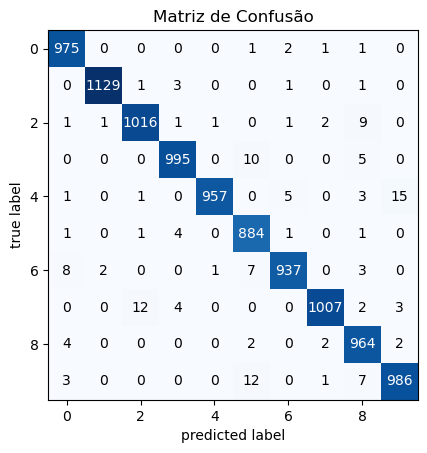

In [81]:
cm_cnn = confusion_matrix(y_test, y_pred_cnn)

plot_confusion_matrix(conf_mat = cm_cnn)
plt.title("Matriz de Confusão")
plt.show()